# **Pueblos mágicos menos visitados de México**

### Visualización de Datos y Narrativa de Historias
#### Prof: Edgar Ávalos Gauna

_Por: María Fernanda Ojeda Carrillo_

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

No me dejaba leer el archivo directamente porque no estaba en formato de encoding UTF 8

In [10]:
import chardet

with open('LocalidadesPueblosMagicos.csv', 'rb') as file:
    result = chardet.detect(file.read(10000))
    print(result)


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [ ]:
#https://datos.gob.mx/busca/dataset?q=pueblos+magicos+de+m%C3%A9xico&page=1
#https://datos.gob.mx/busca/dataset/localidades-que-cuentan-con-el-nombramiento-de-pueblo-magico-dggd
original_data = pd.read_csv('LocalidadesPueblosMagicos.csv', encoding='Windows-1252')

In [ ]:
original_data = 'LocalidadesPueblosMagicos.csv'
df = pd.read_csv(original_data, encoding='Windows-1252')
df.head()

,estado,municipio,ano_ingreso
0,Aguascalientes,Real de Asientos,2006
1,Aguascalientes,Calvillo,2012
2,Aguascalientes,San Jos‚ de Gracia,2015
3,Baja California,Tecate,2012
4,Baja California Sur,Todos Santos,2006


Aunque decía en la [página oficial del gobierno México](https://datos.gob.mx/busca/dataset/localidades-que-cuentan-con-el-nombramiento-de-pueblo-magico-dggd) de la base de datos que la última actualización había sido hace 6 meses, no estaban completos según la siguiente [página](https://www.gob.mx/sectur/articulos/pueblos-magicos-206528) actualizada en el 2020  

Edición de la base de datos original:
- Se le quitó los acentos para que se pudiera leer en formato UTF8 más facilmente
- Se agregaron los pueblos mágicos faltantes
- Se actualizaron nombres según estaban en la página [mencionada arriba (año 2020)]((https://www.gob.mx/sectur/articulos/pueblos-magicos-206528)) y de [Pueblos Mágicos](https://pueblosmagicos.mexicodesconocido.com.mx/) actualizada al año actual (2024)

In [39]:
data = 'LocalidadesPueblosMagicos_edited.csv'
df = pd.read_csv(data)
df.head()

,estado,municipio,ano_ingreso
0,Aguascalientes,Pabellon de Hidalgo,2023
1,Aguascalientes,Real de Asientos,2006
2,Aguascalientes,Calvillo,2012
3,Aguascalientes,San Jose de Gracia,2015
4,Baja California,Tecate,2012


ano_ingreso = el año en el que se convirtió en Pueblo Mágico

In [92]:
df['estado'].unique().tolist()

['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Coahuila',
 'Colima',
 'Chiapas',
 'Chihuahua',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Estado de Mexico',
 'Michoacan',
 'Morelos',
 'Nayarit',
 'Nuevo Leon',
 'Oaxaca',
 'Puebla',
 'Queretaro',
 'Quintana Roo',
 'San Luis Potosi',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz',
 'Yucatan',
 'Zacatecas']

In [93]:
df['estado'].nunique()

31

Estados menos visitados en México

## Mapa de México

In [2]:
import geopandas as gpd

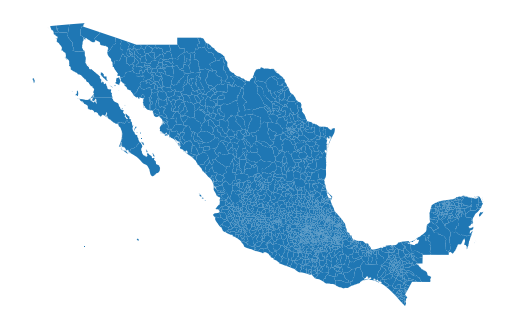

In [77]:
url_mx = "https://github.com/angelnmara/geojson/raw/refs/heads/master/MunicipiosMexico.json"

gpd.read_file(url_mx).plot()

plt.axis('off')
plt.show()

In [ ]:
mapa_mx = gpd.read_file(url_mx)
mapa_mx.head()

,stroke,stroke-opacity,fill-opacity,NAME_0,NAME_1,NAME_2,geometry
0,#ff0000,1,0,Mexico,Aguascalientes,Aguascalientes,"POLYGON ((-102.44799 21.66107, -102.45526 21.6..."
1,#ff0000,1,0,Mexico,Aguascalientes,Asientos,"POLYGON ((-102.22901 22.04062, -102.22579 22.0..."
2,#ff0000,1,0,Mexico,Aguascalientes,Calvillo,"POLYGON ((-102.61303 21.72298, -102.61988 21.7..."
3,#ff0000,1,0,Mexico,Aguascalientes,Cosío,"POLYGON ((-102.25368 22.34621, -102.25368 22.3..."
4,#ff0000,1,0,Mexico,Aguascalientes,Jesús María,"POLYGON ((-102.57815 21.77031, -102.57864 21.7..."


In [46]:
print(mapa_mx.columns)

Index(['id', 'geometry'], dtype='object')


In [47]:
print(mapa_mx.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        0 non-null      object  
 1   geometry  32 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 640.0+ bytes
None


In [58]:
print(mapa_mx.iloc[0])

id                                                       None
geometry    POLYGON ((2817139.623838189 789859.9838340115,...
Name: 0, dtype: object


In [ ]:
#conviertiendo las propiedades del GeoDataFrame en columnas
# (ya no se podran usar las funciones de geopandas hasta reconvertirlo a geopandas otra vez)
mapa_mx = gpd.read_file(url_mx)
mapa_mx = pd.concat([mapa_mx.drop(columns='geometry'), mapa_mx.geometry.apply(pd.Series)], axis=1)


In [60]:
print(mapa_mx.columns)


Index(['stroke', 'stroke-opacity', 'fill-opacity', 'NAME_0', 'NAME_1',
       'NAME_2', 0],
      dtype='object')


In [67]:
mapa_mx['NAME_2'].unique().tolist()

['Aguascalientes',
 'Asientos',
 'Calvillo',
 'Cosío',
 'Jesús María',
 'Pabellón de Arteaga',
 'Rincón de Romos',
 'San José de Gracia',
 'Tepezalá',
 'Ensenada',
 'Mexicali',
 'Mulegé',
 'Tecate',
 'Tijuana',
 'Comondú',
 'La Paz',
 'Calkiní',
 'Campeche',
 'Carmen',
 'Champotón',
 'Hecelchakán',
 'Hopelchén',
 'Palizada',
 'Tenabo',
 'Acacoyagua',
 'Acala',
 'Acapetahua',
 'Altamirano',
 'Amatán',
 'Amatenango de la Frontera',
 'Amatenango del Valle',
 'Angel Albino Corzo',
 'Arriaga',
 'Bejucal de Ocampo',
 'Bella Vista',
 'Berriozábal',
 'Bochil',
 'Cacahoatán',
 'Catazajá',
 'Chalchihuitán',
 'Chamula',
 'Chanal',
 'Chapultenango',
 'Chenalhó',
 'Chiapa de Corzo',
 'Chiapilla',
 'Chicoasén',
 'Chicomuselo',
 'Chilón',
 'Cintalapa',
 'Coapilla',
 'Comitán de Domínguez',
 'Copainalá',
 'El Bosque',
 'El Porvenir',
 'Escuintla',
 'Francisco León',
 'Frontera Comalapa',
 'Frontera Hidalgo',
 'Huehuetán',
 'Huitiupán',
 'Huixtán',
 'Huixtla',
 'Ixhuatán',
 'Ixtacomitán',
 'Ixtapa',
 '

In [ ]:
mapa_mx['NAME_2'].nunique() #contando cada uno de los valores unicos

1720

In [66]:
mapa_mx['NAME_2']

0              Aguascalientes
1                    Asientos
2                    Calvillo
3                       Cosío
4                 Jesús María
                ...          
1849             Villa García
1850    Villa González Ortega
1851            Villa Hidalgo
1852               Villanueva
1853                Zacatecas
Name: NAME_2, Length: 1854, dtype: object

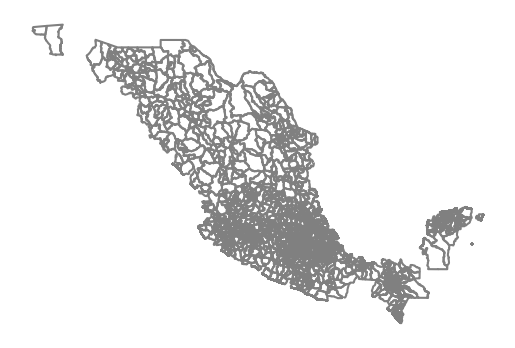

In [81]:
mapa_mx_geo = gpd.read_file(url_mx)
mapa_mx_geo.boundary.plot(edgecolor="gray")

plt.axis('off')
plt.show()

In [ ]:
print(mapa_mx_geo.total_bounds)  # [min_x, min_y, max_x, max_y]


[-118.36888885   14.53291702  -86.71013641   32.71804047]


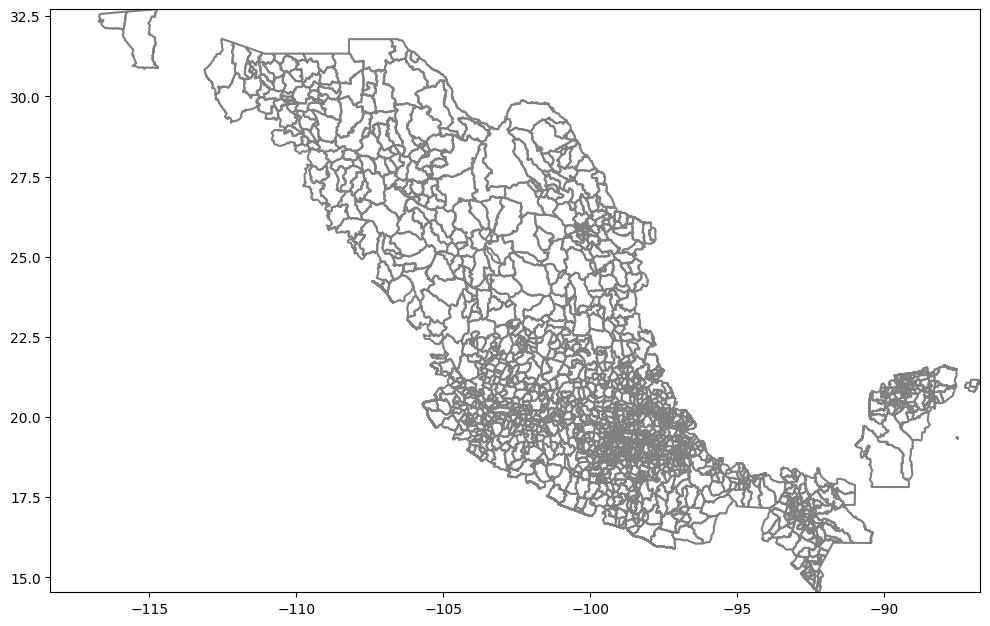

In [85]:
fig, axs = plt.subplots(figsize=(12, 12))
mapa_mx_geo.boundary.plot(ax=axs, edgecolor="gray")

# Ajustar los límites de los ejes
axs.set_xlim([-118.36888885, -86.71013641])  # Límite de longitud (X)
axs.set_ylim([14.53291702, 32.71804047])    # Límite de latitud (Y)

plt.show()


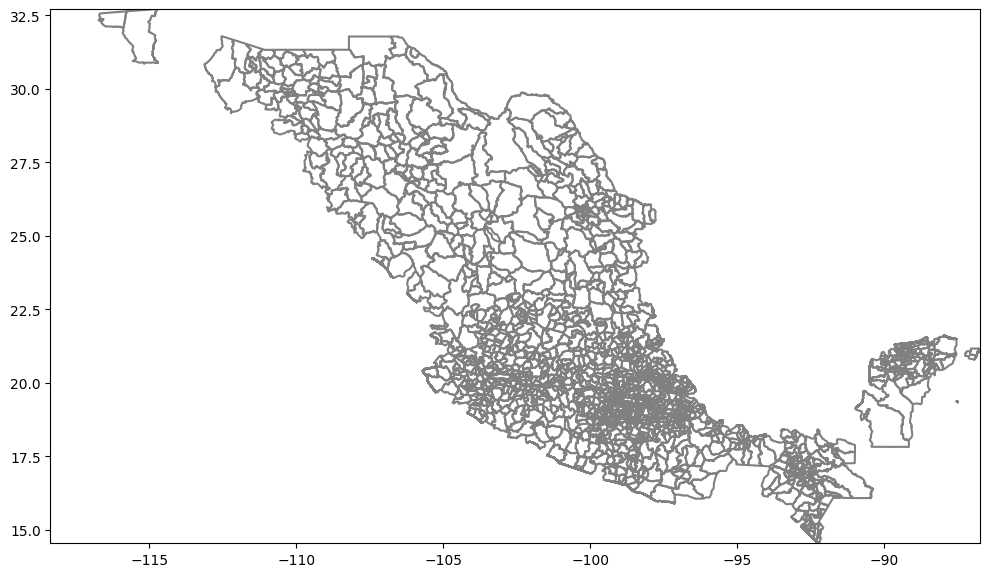

In [87]:
fig, axs = plt.subplots(figsize=(12, 12))
mapa_mx_geo.boundary.plot(ax=axs, edgecolor="gray")

# Ajustar automáticamente los límites
axs.set_xlim(mapa_mx_geo.total_bounds[0], mapa_mx_geo.total_bounds[2])
axs.set_ylim(mapa_mx_geo.total_bounds[1], mapa_mx_geo.total_bounds[3])

# Forzar el aspecto para que sea proporcional
axs.set_aspect('equal', 'box')

plt.show()


In [ ]:
url_mx = "https://github.com/edavgaun/GeoJson/raw/refs/heads/main/Mexico/mexicoHigh.json"
gpd.read_file(url_mx).plot()

In [3]:
mapa_mx = gpd.read_file(url_mx)
mapa_mx.head()

,id,geometry
0,None,"POLYGON ((2817139.624 789859.984, 2816779.233 ..."
1,None,"MULTIPOLYGON (((2723197.679 539350.633, 272320..."
2,None,"POLYGON ((2722788.795 919938.791, 2722752.425 ..."
3,None,"POLYGON ((2817139.624 789859.984, 2817821.832 ..."
4,None,"MULTIPOLYGON (((2050677.038 1245244.826, 20506..."


<Axes: >

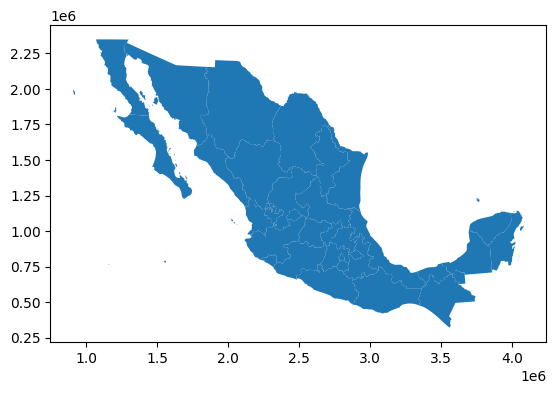

In [4]:
url_mx = "https://github.com/edavgaun/topojson/raw/refs/heads/master/countries/mexico/Mexico_states.json"
gpd.read_file(url_mx).plot()

In [5]:
mapa_mx = gpd.read_file(url_mx)
mapa_mx.head()

,id,geometry
0,None,"POLYGON ((2817139.624 789859.984, 2816779.233 ..."
1,None,"MULTIPOLYGON (((2723197.679 539350.633, 272320..."
2,None,"POLYGON ((2722788.795 919938.791, 2722752.425 ..."
3,None,"POLYGON ((2817139.624 789859.984, 2817821.832 ..."
4,None,"MULTIPOLYGON (((2050677.038 1245244.826, 20506..."


<Axes: >

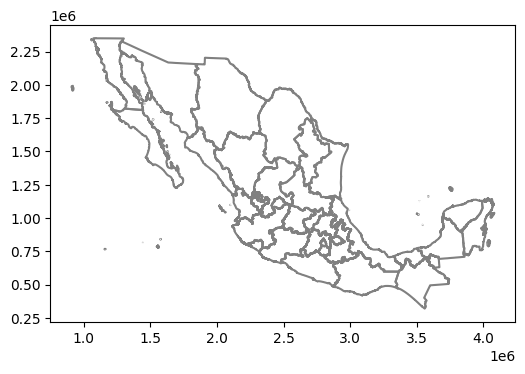

In [8]:
fig, axs = plt.subplots(figsize=(6,6))
mapa_mx.boundary.plot(ax=axs, edgecolor="gray")